In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
help(sns)

Help on package seaborn:

NAME
    seaborn - # Import seaborn objects

PACKAGE CONTENTS
    _compat
    _core (package)
    _decorators
    _docstrings
    _marks (package)
    _oldcore
    _statistics
    _stats (package)
    _testing
    algorithms
    axisgrid
    categorical
    cm
    colors (package)
    distributions
    external (package)
    matrix
    miscplot
    objects
    palettes
    rcmod
    regression
    relational
    utils
    widgets

DATA
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.12.2

FILE
    /opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/__init__.py




In [20]:
import pandas as pd
# Load the data
data_path = 'fwd_pass_results.csv'  # Update this path to the location of your CSV file
data = pd.read_csv(data_path)

# Data preprocessing to remove the '%' sign and convert the '% of peak' column to a float
data['% of peak'] = data['% of peak'].str.replace('%', '').astype(float)

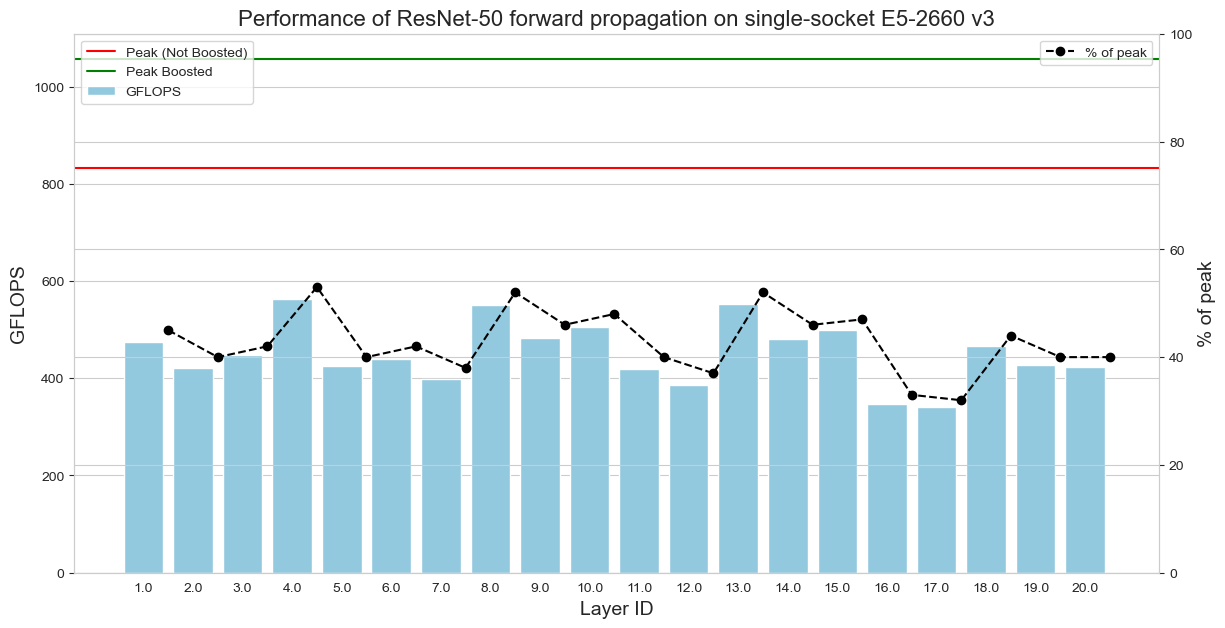

In [22]:


# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 7))


# Plotting GFLOPs as a bar plot
sns.barplot(x='Layer ID', y='GFLOPS', data=data, ax=ax1, color='skyblue', label='GFLOPS')

bar_width = 1
line_x = data['Layer ID'] - bar_width / 2

# Creating a twin Axes sharing the xaxis to plot the '% of peak' line plot
ax2 = ax1.twinx()
ax2.plot(line_x, data['% of peak'], color='black',linestyle='--', marker='o', label='% of peak')


# Setting the axis labels and title
ax1.set_xlabel('Layer ID', fontsize=14)
ax1.set_ylabel('GFLOPS', fontsize=14)
ax2.set_ylabel('% of peak', fontsize=14)
plt.title('Performance of ResNet-50 forward propagation on single-socket E5-2660 v3', fontsize=16)

# Adding horizontal lines for 'Peak (Not Boosted)' and 'Peak Boosted'
ax1.axhline(data['Peak (Not Boosted)'].iloc[0], color='red', linestyle='-', label='Peak (Not Boosted)')
ax1.axhline(data['Peak Boosted'].iloc[0], color='green', linestyle='-', label='Peak Boosted')

ax2.set_ylim(0, 100)

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


In [7]:
data

,Layer ID,GFLOPS,% of peak,Peak (Not Boosted),Peak Boosted
0,1.0,376.45,71.0,416.0,528.0
1,2.0,317.16,60.0,416.0,528.0
2,3.0,222.34,42.0,416.0,528.0
3,4.0,500.80,95.0,416.0,528.0
4,5.0,321.38,61.0,416.0,528.0
5,6.0,393.34,74.0,416.0,528.0
6,7.0,272.74,52.0,416.0,528.0
7,8.0,504.45,96.0,416.0,528.0
8,9.0,326.34,62.0,416.0,528.0
9,10.0,414.35,78.0,416.0,528.0


In [12]:
plt.savefig("Xeon-E52660v3-fwd-pass.png")

<Figure size 640x480 with 0 Axes>

In [13]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, *, dpi='figure', format=None, metadata=None,
              bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto',
              backend=None, **kwargs
             )
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then the format is inf

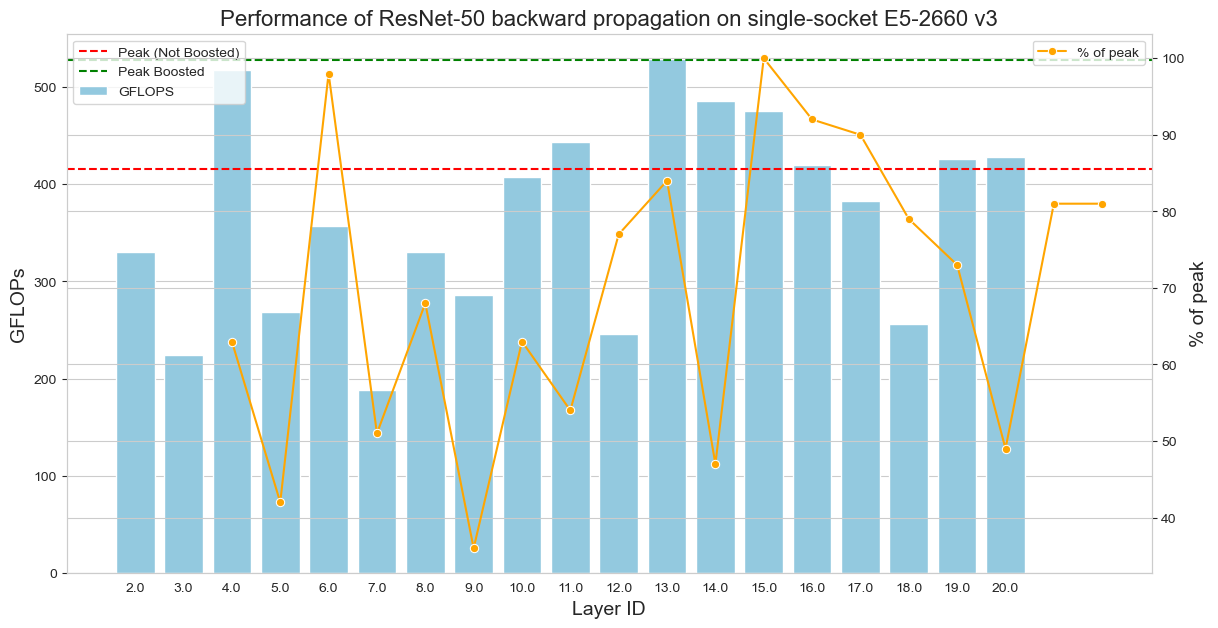

In [11]:
import pandas as pd
# Load the data
data_path = 'bwd_pass_results.csv'  # Update this path to the location of your CSV file
data = pd.read_csv(data_path)

# Data preprocessing to remove the '%' sign and convert the '% of peak' column to a float
data['% of peak'] = data['% of peak'].str.replace('%', '').astype(float)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting GFLOPs as a bar plot
sns.barplot(x='Layer ID', y='GFLOPS', data=data, ax=ax1, color='skyblue', label='GFLOPS')

# Creating a twin Axes sharing the xaxis to plot the '% of peak' line plot
ax2 = ax1.twinx()
sns.lineplot(x='Layer ID', y='% of peak', data=data, ax=ax2, color='orange', linestyle='--',marker='o', label='% of peak')

# Setting the axis labels and title
ax1.set_xlabel('Layer ID', fontsize=14)
ax1.set_ylabel('GFLOPs', fontsize=14)
ax2.set_ylabel('% of peak', fontsize=14)
plt.title('Performance of ResNet-50 backward propagation on single-socket E5-2660 v3', fontsize=16)

# Adding horizontal lines for 'Peak (Not Boosted)' and 'Peak Boosted'
ax1.axhline(data['Peak (Not Boosted)'].iloc[0], color='red', linestyle='-', label='Peak (Not Boosted)')
ax1.axhline(data['Peak Boosted'].iloc[0], color='green', linestyle='-', label='Peak Boosted')

ax2.set_ylim(0, 100)

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()
